# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337290 entries, 0 to 2337289
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21089
Address                             12
Zip Code                         14510
Council District                 47543
APD Sector                        9236
APD District                      9721
PRA                              11012
Census Tract                    485598
Clearance Status                610747
Clearance Date                  341555
UCR Category                   1538507
Category Description           1538507
X-coordinate                     10410
Y-coordinate                     10410
Latitude                         39600
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number  Highest Offense Description  Highest Offense Code  \
2337285      20143631822           FAMILY DISTURBANCE                  3400   
2337286      20191270738         THEFT BY SHOPLIFTING                   607   
2337287       2008501470  CRIMINAL TRESPASS/TRANSIENT                  2721   
2337288    2003921400113                          DWI                  2100   
2337289      20081340129    URINATING IN PUBLIC PLACE                  3212   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2337285               N  12/29/2014 11:41:00 PM    12/29/2014         2341.0   
2337286               N  05/07/2019 10:50:00 AM    05/07/2019         1050.0   
2337287               N  02/19/2008 05:00:00 PM    02/19/2008         1700.0   
2337288               N  05/20/2003 01:32:00 AM    05/20/2003          132.0   
2337289               N  05/13/2008 01:10:00 AM    05/13/2008          110.0   

               Report Date Time Report Date  Report Time  \
2337285  12/29/2014 11:41:00 PM  12/29/2014       2341.0   
2337286  05/07/2019 11:31:00 AM  05/07/2019       1131.0   
2337287  02/19/2008 05:00:00 PM  02/19/2008       1700.0   
2337288  05/20/2003 01:32:00 AM  05/20/2003        132.0   
2337289  05/13/2008 01:10:00 AM  05/13/2008        110.0   

                        Location Type               Address  Zip Code  \
2337285              RESIDENCE / HOME    109 MASTERSON PASS   78753.0   
2337286   DEPARTMENT / DISCOUNT STORE    11423 N LAMAR BLVD   78753.0   
2337287         PARKING LOTS / GARAGE       6800 BERKMAN DR   78723.0   
2337288  STREETS / HWY / ROAD / ALLEY  4500 N MOPAC EXPY NB   78731.0   
2337289  STREETS / HWY / ROAD / ALLEY    400 BLOCK E 6TH ST   78701.0   

         Council District APD Sector APD District  PRA  Census Tract  \
2337285               4.0         ED            1  240         18.23   
2337286               7.0         ED            4  221         18.24   
2337287               1.0         ID            5  293         21.00   
2337288              10.0         BA            6  325          1.00   
2337289               9.0         GE            2  382         11.00   

        Clearance Status Clearance Date UCR Category Category Description  \
2337285                N     01/02/2015          NaN                  NaN   
2337286              NaN            NaN          23C                Theft   
2337287              NaN            NaN          NaN                  NaN   
2337288                C     05/22/2003          NaN                  NaN   
2337289                C     05/17/2008          NaN                  NaN   

         X-coordinate  Y-coordinate   Latitude  Longitude  \
2337285     3130776.0     3130776.0  30.369795 -97.687855   
2337286     3131578.0     3131578.0  30.383630 -97.684932   
2337287     3130390.0     3130390.0  30.320281 -97.690437   
2337288     3109748.0     3109748.0  30.320565 -97.755869   
2337289     3115491.0     3115491.0  30.267351 -97.739093   

                            Location  
2337285  (30.36979494, -97.68785533)  
2337286  (30.38362955, -97.68493154)  
2337287   (30.32028083, -97.6904366)  
2337288   (30.32056515, -97.7558693)  
2337289  (30.26735144, -97.73909331)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
df.duplicated().sum()

706

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2336584 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01          AGG SEXUAL ASSAULT CHILD/OBJEC           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          OBTAIN CONTROLLED SUB BY FRAUD           False   
2003-01-01          AGG SEXUAL ASSAULT CHILD/OBJEC           False   
2003-01-01          INDECENCY WITH A CHILD/CONTACT            True   

                      report_date_time     location_type  \
occurred_date_time                                         
2003-01-01         2012-07-18 12:00:00  RESIDENCE / HOME   
2003-01-01         2012-05-25 11:04:00  RESIDENCE / HOME   
2003-01-01         2003-11-14 09:30:00               NaN   
2003-01-01         2008-09-17 11:43:00  RESIDENCE / HOME   
2003-01-01         2017-10-02 21:14:00  RESIDENCE / HOME   

                                             address zip_code  \
occurred_date_time                                              
2003-01-01                      1100 BLOCK HARVEY ST  78702.0   
2003-01-01                             1105 LILY TER  78741.0   
2003-01-01                   6818 AUSTIN CENTER BLVD  78731.0   
2003-01-01                 2500 BLOCK S CONGRESS AVE  78704.0   
2003-01-01          1200 BLOCK AUSTIN HIGHLANDS BLVD  78745.0   

                   council_district apd_sector apd_district    pra  \
occurred_date_time                                                   
2003-01-01                      1.0         CH            2    415   
2003-01-01                      3.0         HE            3  443.0   
2003-01-01                     10.0         BA            8    273   
2003-01-01                      3.0         DA            2  479.0   
2003-01-01                      2.0         FR            4  509.0   

                   census_tract clearance_status clearance_date  \
occurred_date_time                                                
2003-01-01                  8.0             True     2013-02-27   
2003-01-01                  NaN            False     2012-05-25   
2003-01-01                  NaN            False     2003-12-01   
2003-01-01                 23.0            False     2008-10-27   
2003-01-01                  NaN            False     2018-08-02   

                   category_description   latitude  longitude    year  month  \
occurred_date_time                                                             
2003-01-01                         Rape        NaN        NaN  2003.0    1.0   
2003-01-01                          NaN  30.234098 -97.701901  2003.0    1.0   
2003-01-01                          NaN  30.350588 -97.751779  2003.0    1.0   
2003-01-01                         Rape        NaN        NaN  2003.0    1.0   
2003-01-01                          NaN        NaN        NaN  2003.0    1.0   

                    week  day  hour  
occurred_date_time                   
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                                 
NaT                            SUSPICIOUS PERSON           False   
NaT                            SUSPICIOUS PERSON           False   
NaT                 POSS CONTROLLED SUB/NARCOTIC           False   
NaT                                RUNAWAY CHILD           False   
NaT                          BURGLARY OF VEHICLE           False   

                      report_date_time     location_type  \
occurred_date_time                                         
NaT                2005-05-24 20:14:00               NaN   
NaT                2008-01-11 10:33:00               NaN   
NaT                2007-04-04 18:39:00               NaN   
NaT                2004-02-24 22:55:00               NaN   
NaT                2003-05-06 10:47:00  RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            8200 GEORGIAN DR  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                                1511 FARO DR  78741.0              3.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                         1908 SAN ANTONIO ST  78705.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0        18.00   
NaT                        GE            2  381.0        11.00   
NaT                        HE            3  442.0        23.17   
NaT                        DA            1  476.0        13.00   
NaT                        BA            1  359.0         6.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False     2005-06-28                  NaN   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2007-07-25                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                           False            NaT                Theft   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.347657 -97.703221   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.235041 -97.713595   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.282945 -97.743406   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    209310
78753.0    181620
78701.0    170284
78758.0    162095
78704.0    156837
78745.0    153001
78702.0    138170
78744.0    128118
78723.0    120123
78752.0     85637
78748.0     69306
78759.0     67536
78751.0     65101
78757.0     58877
78705.0     57988
78721.0     48339
78749.0     41028
78724.0     38218
78727.0     36534
78703.0     35756
78731.0     29221
78746.0     28486
78729.0     25822
78750.0     24182
78754.0     23434

zip_code
78741.0  0.090139
78753.0  0.078214
78701.0  0.073333
78758.0  0.069806
78704.0  0.067542
78745.0  0.065890
78702.0  0.059503
78744.0  0.055174
78723.0  0.051731
78752.0  0.036879
78748.0  0.029847
78759.0  0.029084
78751.0  0.028036
78757.0  0.025355
78705.0  0.024972
78721.0  0.020817
78749.0  0.017669
78724.0  0.016459
78727.0  0.015733
78703.0  0.015398
78731.0  0.012584
78746.0  0.012267
78729.0  0.011120
78750.0  0.010414
78754.0  0.010092

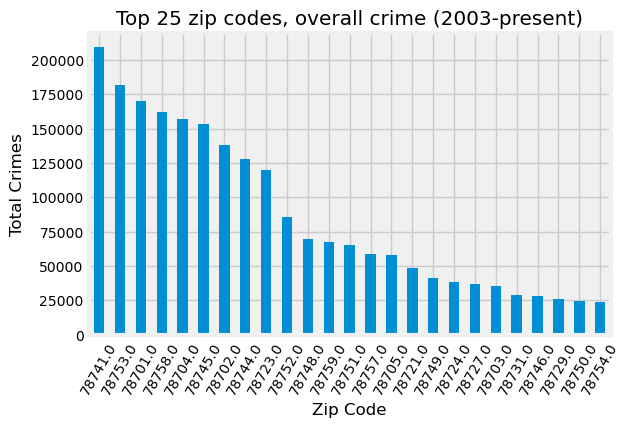

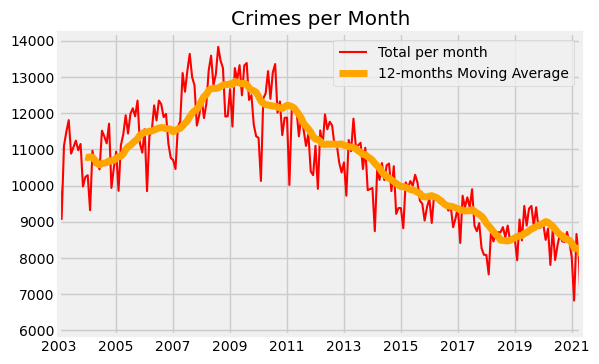

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  232550
THEFT                                                213762
FAMILY DISTURBANCE                                   182894
CRIMINAL MISCHIEF                                    129137
ASSAULT W/INJURY-FAM/DATE VIOL                        79084
BURGLARY OF RESIDENCE                                 77679
DWI                                                   70170
PUBLIC INTOXICATION                                   69011
HARASSMENT                                            65027
DISTURBANCE - OTHER                                   62417

BURGLARY OF VEHICLE  CRIMINAL MISCHIEF  \
occurred_date_time                                           
2003-01-31                         1225                722   
2003-02-28                         1110                594   
2003-03-31                         1222                700   
2003-04-30                         1396                709   
2003-05-31                         1487                750   
...                                 ...                ...   
2021-01-31                          360                432   
2021-02-28                          309                338   
2021-03-31                          432                430   
2021-04-30                          367                411   
2021-05-31                          258                333   

                    BURGLARY OF RESIDENCE  HARASSMENT  \
occurred_date_time                                      
2003-01-31                            328         293   
2003-02-28                            248         309   
2003-03-31                            393         363   
2003-04-30                            398         353   
2003-05-31                            436         345   
...                                   ...         ...   
2021-01-31                            128         257   
2021-02-28                            118         167   
2021-03-31                            154         194   
2021-04-30                            131         168   
2021-05-31                            138         124   

                    ASSAULT W/INJURY-FAM/DATE VIOL  PUBLIC INTOXICATION  DWI  \
occurred_date_time                                                             
2003-01-31                                     349                  341  408   
2003-02-28                                     342                  354  328   
2003-03-31                                     421                  450  406   
2003-04-30                                     432                  385  375   
2003-05-31                                     424                  451  418   
...                                            ...                  ...  ...   
2021-01-31                                     256                   55  169   
2021-02-28                                     245                   62  130   
2021-03-31                                     259                   75  179   
2021-04-30                                     268                   67  131   
2021-05-31                                     266                   52  124   

                    FAMILY DISTURBANCE  TOTAL  
occurred_date_time                             
2003-01-31                         505   4171  
2003-02-28                         500   3785  
2003-03-31                         546   4501  
2003-04-30                         678   4726  
2003-05-31                         650   4961  
...                                ...    ...  
2021-01-31                         815   2472  
2021-02-28                         812   2181  
2021-03-31                         876   2599  
2021-04-30                         799   2342  
2021-05-31                         713   2008  

[221 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

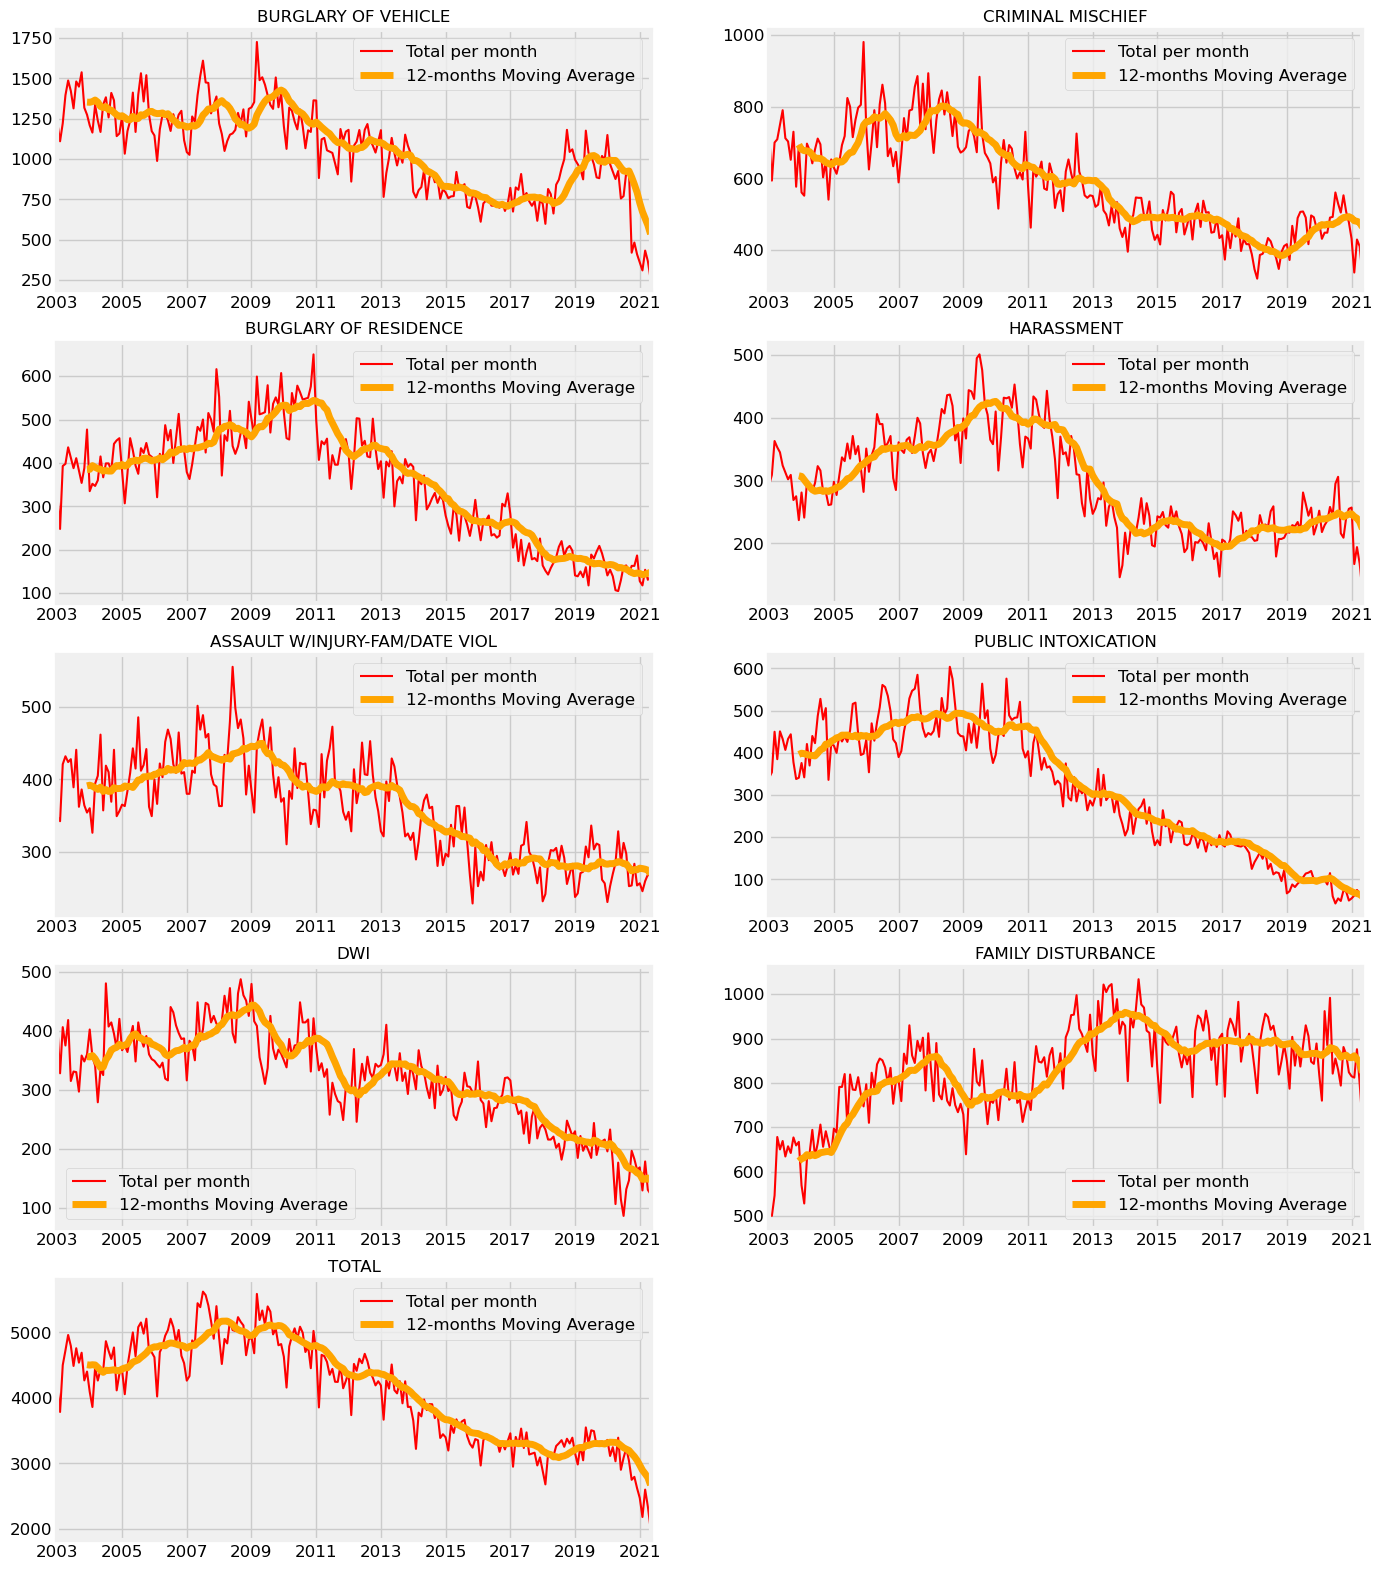

In [9]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17209
THEFT                                                 15959
BURGLARY OF VEHICLE                                    9337
WARRANT ARREST NON TRAFFIC                             8968
DWI                                                    8354
ASSAULT WITH INJURY                                    7642
VIOL CITY ORDINANCE - OTHER                            6192
POSS OF DRUG PARAPHERNALIA                             6098
CRIMINAL MISCHIEF                                      5918
CRIMINAL TRESPASS                                      3961
POSSESSION OF MARIJUANA                                3409
DISTURBANCE - OTHER                                    3398
CUSTODY ARREST TRAFFIC WARR                            2993
POSS CONTROLLED SUB/NARCOTIC                           2927
CAMPING IN PARK                                        2785
VOCO - ALCOHOL  CONSUMPTION                            2690
ASSAULT BY CONTACT                                     2633
CRIMINAL TRESPASS/TRANSIENT                            2594
THEFT OF BICYCLE                                       2543
URINATING IN PUBLIC PLACE                              2337
FAMILY DISTURBANCE                                     2210
DOC FIGHTING                                           2139
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1748

highest_offense_description
PUBLIC INTOXICATION                                0.101061
THEFT                                              0.093720
BURGLARY OF VEHICLE                                0.054832
WARRANT ARREST NON TRAFFIC                         0.052665
DWI                                                0.049059
ASSAULT WITH INJURY                                0.044878
VIOL CITY ORDINANCE - OTHER                        0.036363
POSS OF DRUG PARAPHERNALIA                         0.035811
CRIMINAL MISCHIEF                                  0.034754
CRIMINAL TRESPASS                                  0.023261
POSSESSION OF MARIJUANA                            0.020019
DISTURBANCE - OTHER                                0.019955
CUSTODY ARREST TRAFFIC WARR                        0.017577
POSS CONTROLLED SUB/NARCOTIC                       0.017189
CAMPING IN PARK                                    0.016355
VOCO - ALCOHOL  CONSUMPTION                        0.015797
ASSAULT BY CONTACT                                 0.015462
CRIMINAL TRESPASS/TRANSIENT                        0.015233
THEFT OF BICYCLE                                   0.014934
URINATING IN PUBLIC PLACE                          0.013724
FAMILY DISTURBANCE                                 0.012978
DOC FIGHTING                                       0.012561
PROTECTIVE ORDER                                   0.012326
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010265

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

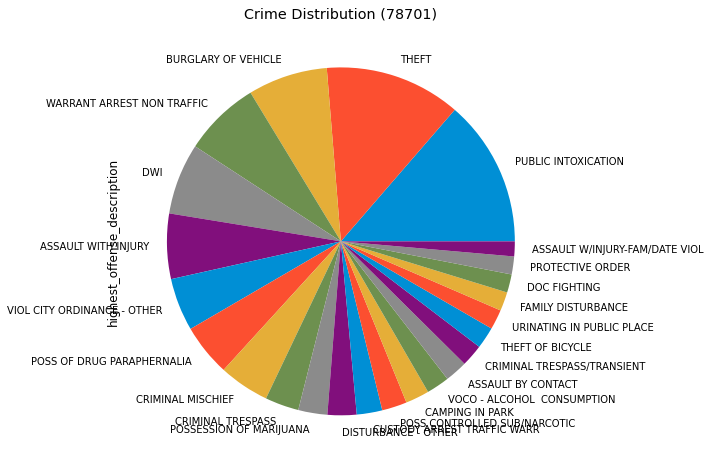

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17285
BURGLARY OF VEHICLE                                   16035
FAMILY DISTURBANCE                                    14924
CRIMINAL MISCHIEF                                      9583
THEFT BY SHOPLIFTING                                   7709
ASSAULT W/INJURY-FAM/DATE VIOL                         7271
BURGLARY OF RESIDENCE                                  6119
DWI                                                    5087
DISTURBANCE - OTHER                                    4837
CUSTODY ARREST TRAFFIC WARR                            4352
AUTO THEFT                                             4324
HARASSMENT                                             4310
POSS OF DRUG PARAPHERNALIA                             3739
ASSAULT WITH INJURY                                    3383
PUBLIC INTOXICATION                                    3378
CRIMINAL TRESPASS                                      3185
POSS CONTROLLED SUB/NARCOTIC                           3011
RUNAWAY CHILD                                          2962
WARRANT ARREST NON TRAFFIC                             2798
POSSESSION OF MARIJUANA                                2716
BURGLARY NON RESIDENCE                                 2524
VIOL CITY ORDINANCE - OTHER                            1871

----------------------------------


highest_offense_description
THEFT                                              0.095171
BURGLARY OF VEHICLE                                0.088289
FAMILY DISTURBANCE                                 0.082172
CRIMINAL MISCHIEF                                  0.052764
THEFT BY SHOPLIFTING                               0.042446
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040034
BURGLARY OF RESIDENCE                              0.033691
DWI                                                0.028009
DISTURBANCE - OTHER                                0.026633
CUSTODY ARREST TRAFFIC WARR                        0.023962
AUTO THEFT                                         0.023808
HARASSMENT                                         0.023731
POSS OF DRUG PARAPHERNALIA                         0.020587
ASSAULT WITH INJURY                                0.018627
PUBLIC INTOXICATION                                0.018599
CRIMINAL TRESPASS                                  0.017537
POSS CONTROLLED SUB/NARCOTIC                       0.016579
RUNAWAY CHILD                                      0.016309
WARRANT ARREST NON TRAFFIC                         0.015406
POSSESSION OF MARIJUANA                            0.014954
BURGLARY NON RESIDENCE                             0.013897
VIOL CITY ORDINANCE - OTHER                        0.010302

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

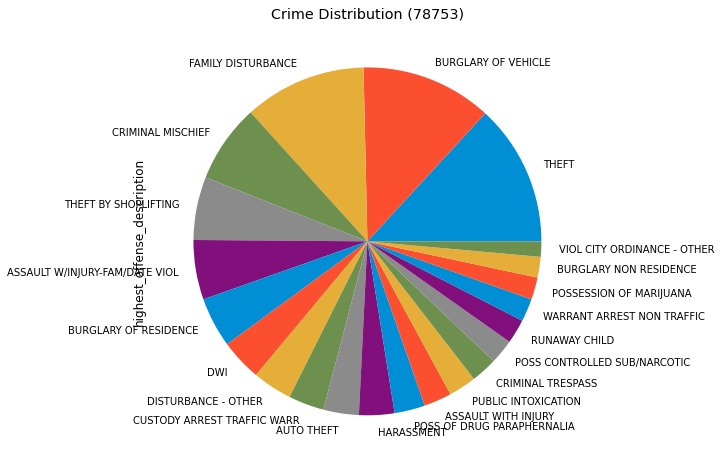

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20659
BURGLARY OF VEHICLE                                   19934
THEFT                                                 15741
CRIMINAL MISCHIEF                                     11152
ASSAULT W/INJURY-FAM/DATE VIOL                         9714
BURGLARY OF RESIDENCE                                  8937
PUBLIC INTOXICATION                                    6402
CUSTODY ARREST TRAFFIC WARR                            6011
DWI                                                    5705
HARASSMENT                                             5594
DISTURBANCE - OTHER                                    5227
AUTO THEFT                                             4734
ASSAULT WITH INJURY                                    4591
CRIMINAL TRESPASS                                      3977
POSS CONTROLLED SUB/NARCOTIC                           3904
POSSESSION OF MARIJUANA                                3805
THEFT BY SHOPLIFTING                                   3596
POSS OF DRUG PARAPHERNALIA                             3554
WARRANT ARREST NON TRAFFIC                             3448
RUNAWAY CHILD                                          2810
VIOL CITY ORDINANCE - OTHER                            2197

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098700
BURGLARY OF VEHICLE                                0.095237
THEFT                                              0.075204
CRIMINAL MISCHIEF                                  0.053280
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046410
BURGLARY OF RESIDENCE                              0.042697
PUBLIC INTOXICATION                                0.030586
CUSTODY ARREST TRAFFIC WARR                        0.028718
DWI                                                0.027256
HARASSMENT                                         0.026726
DISTURBANCE - OTHER                                0.024973
AUTO THEFT                                         0.022617
ASSAULT WITH INJURY                                0.021934
CRIMINAL TRESPASS                                  0.019001
POSS CONTROLLED SUB/NARCOTIC                       0.018652
POSSESSION OF MARIJUANA                            0.018179
THEFT BY SHOPLIFTING                               0.017180
POSS OF DRUG PARAPHERNALIA                         0.016980
WARRANT ARREST NON TRAFFIC                         0.016473
RUNAWAY CHILD                                      0.013425
VIOL CITY ORDINANCE - OTHER                        0.010496

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

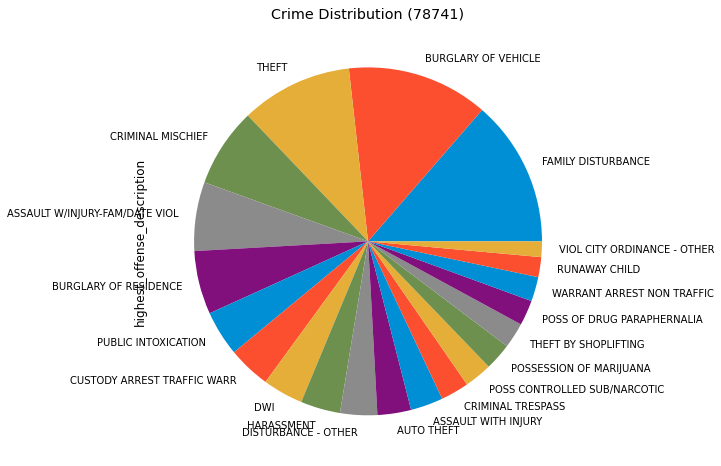

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15202
BURGLARY OF VEHICLE                                   14799
THEFT                                                 13674
CRIMINAL MISCHIEF                                      8629
BURGLARY OF RESIDENCE                                  5896
ASSAULT W/INJURY-FAM/DATE VIOL                         5817
HARASSMENT                                             5180
DISTURBANCE - OTHER                                    4580
DWI                                                    4453
PUBLIC INTOXICATION                                    4012
CUSTODY ARREST TRAFFIC WARR                            3248
AUTO THEFT                                             2921
BURGLARY NON RESIDENCE                                 2899
ASSAULT WITH INJURY                                    2728
RUNAWAY CHILD                                          2623
POSSESSION OF MARIJUANA                                2597
WARRANT ARREST NON TRAFFIC                             2112
POSS CONTROLLED SUB/NARCOTIC                           2058
THEFT BY SHOPLIFTING                                   2021
CRIMINAL TRESPASS                                      1979
IDENTITY THEFT                                         1677
POSS OF DRUG PARAPHERNALIA                             1528

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.099359
BURGLARY OF VEHICLE                                0.096725
THEFT                                              0.089372
CRIMINAL MISCHIEF                                  0.056398
BURGLARY OF RESIDENCE                              0.038536
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038019
HARASSMENT                                         0.033856
DISTURBANCE - OTHER                                0.029934
DWI                                                0.029104
PUBLIC INTOXICATION                                0.026222
CUSTODY ARREST TRAFFIC WARR                        0.021229
AUTO THEFT                                         0.019091
BURGLARY NON RESIDENCE                             0.018948
ASSAULT WITH INJURY                                0.017830
RUNAWAY CHILD                                      0.017144
POSSESSION OF MARIJUANA                            0.016974
WARRANT ARREST NON TRAFFIC                         0.013804
POSS CONTROLLED SUB/NARCOTIC                       0.013451
THEFT BY SHOPLIFTING                               0.013209
CRIMINAL TRESPASS                                  0.012935
IDENTITY THEFT                                     0.010961
POSS OF DRUG PARAPHERNALIA                         0.009987

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

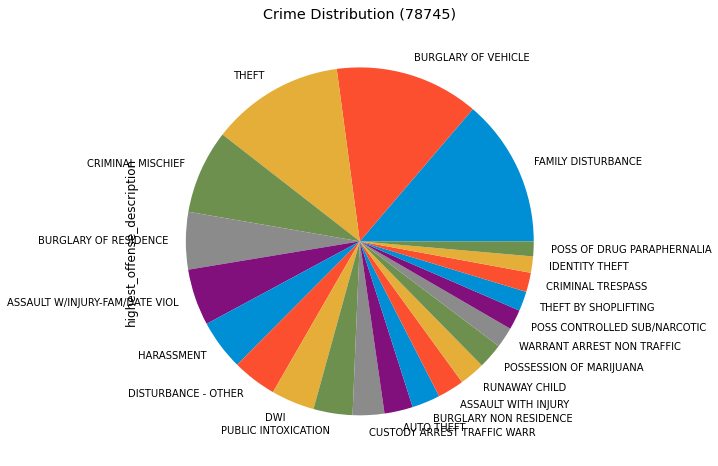

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8704
THEFT                                                  5662
CRIMINAL MISCHIEF                                      5012
THEFT OF BICYCLE                                       3540
PUBLIC INTOXICATION                                    2631
BURGLARY OF RESIDENCE                                  2136
WARRANT ARREST NON TRAFFIC                             1551
CRIMINAL TRESPASS                                      1372
AUTO THEFT                                             1370
ASSAULT WITH INJURY                                    1274
HARASSMENT                                             1237
FAMILY DISTURBANCE                                     1227
DWI                                                    1221
DISTURBANCE - OTHER                                    1129
BURGLARY NON RESIDENCE                                  888
CRIMINAL TRESPASS/TRANSIENT                             868
VIOL CITY ORDINANCE - OTHER                             792
GRAFFITI                                                785
CUSTODY ARREST TRAFFIC WARR                             782
ASSAULT W/INJURY-FAM/DATE VIOL                          708
POSSESSION OF MARIJUANA                                 664
ASSAULT BY CONTACT                                      629

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.150100
THEFT                                              0.097641
CRIMINAL MISCHIEF                                  0.086432
THEFT OF BICYCLE                                   0.061047
PUBLIC INTOXICATION                                0.045371
BURGLARY OF RESIDENCE                              0.036835
WARRANT ARREST NON TRAFFIC                         0.026747
CRIMINAL TRESPASS                                  0.023660
AUTO THEFT                                         0.023626
ASSAULT WITH INJURY                                0.021970
HARASSMENT                                         0.021332
FAMILY DISTURBANCE                                 0.021160
DWI                                                0.021056
DISTURBANCE - OTHER                                0.019470
BURGLARY NON RESIDENCE                             0.015314
CRIMINAL TRESPASS/TRANSIENT                        0.014969
VIOL CITY ORDINANCE - OTHER                        0.013658
GRAFFITI                                           0.013537
CUSTODY ARREST TRAFFIC WARR                        0.013486
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012209
POSSESSION OF MARIJUANA                            0.011451
ASSAULT BY CONTACT                                 0.010847

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

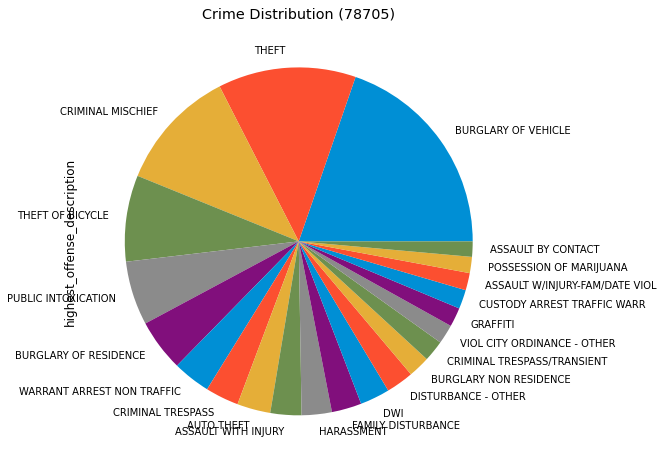

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5438
THEFT                                                  5112
THEFT BY SHOPLIFTING                                   2561
CRIMINAL MISCHIEF                                      1281
DWI                                                     890
FAMILY DISTURBANCE                                      775
VIOL CITY ORDINANCE - OTHER                             652
HARASSMENT                                              637
AUTO THEFT                                              612
BURGLARY OF RESIDENCE                                   525
THEFT FROM PERSON                                       462
IDENTITY THEFT                                          452
DISTURBANCE - OTHER                                     437
BURGLARY NON RESIDENCE                                  358
ASSAULT W/INJURY-FAM/DATE VIOL                          342
CRED CARD ABUSE - OTHER                                 330
PUBLIC INTOXICATION                                     321
POSSESSION OF MARIJUANA                                 297
FRAUD - OTHER                                           284
SUSPICIOUS PERSON                                       259
CUSTODY ARREST TRAFFIC WARR                             247
WARRANT ARREST NON TRAFFIC                              223
ASSAULT WITH INJURY                                     199
VIOL WATER SAFETY ACT                                   195

highest_offense_description
BURGLARY OF VEHICLE                                0.190901
THEFT                                              0.179457
THEFT BY SHOPLIFTING                               0.089904
CRIMINAL MISCHIEF                                  0.044969
DWI                                                0.031243
FAMILY DISTURBANCE                                 0.027206
VIOL CITY ORDINANCE - OTHER                        0.022888
HARASSMENT                                         0.022362
AUTO THEFT                                         0.021484
BURGLARY OF RESIDENCE                              0.018430
THEFT FROM PERSON                                  0.016218
IDENTITY THEFT                                     0.015867
DISTURBANCE - OTHER                                0.015341
BURGLARY NON RESIDENCE                             0.012568
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012006
CRED CARD ABUSE - OTHER                            0.011585
PUBLIC INTOXICATION                                0.011269
POSSESSION OF MARIJUANA                            0.010426
FRAUD - OTHER                                      0.009970
SUSPICIOUS PERSON                                  0.009092
CUSTODY ARREST TRAFFIC WARR                        0.008671
WARRANT ARREST NON TRAFFIC                         0.007828
ASSAULT WITH INJURY                                0.006986
VIOL WATER SAFETY ACT                              0.006845

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

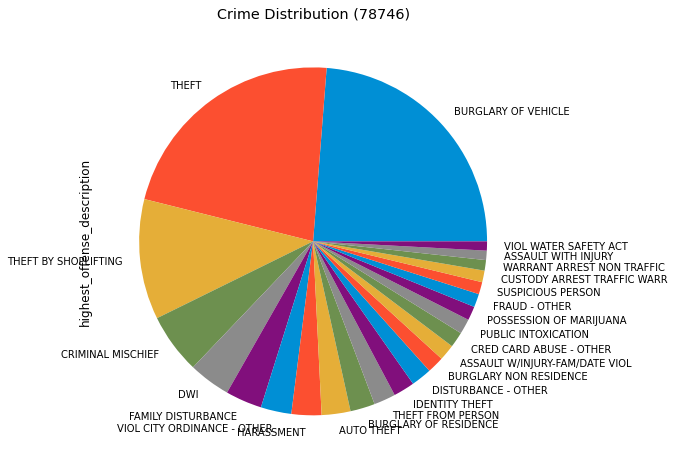

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for violent crime & murder rates

"""First, I wanted to update the naming of the offense types to make everything more presentable, 
including combining 'CAPITAL MURDER' with 'MURDER'."""

df.highest_offense_description = df.highest_offense_description.replace(
    {
        "CAPITAL MURDER": "MURDER",
        "AGG ROBBERY/DEADLY WEAPON": "ARMED ROBBERY",
        "AGG ASSAULT": "AGGRAVATED ASSAULT",
    }
)

df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_viol_mur = df_viol[df_viol.category_description == "Murder"]
df_agg_asslt = df_viol[df_viol.category_description == "Aggravated Assault"]
df_agg_robbery = df_viol[df_viol.category_description == "Robbery"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]
df_viol_mur_21 = df_viol_mur[df_viol_mur.year == 2021]

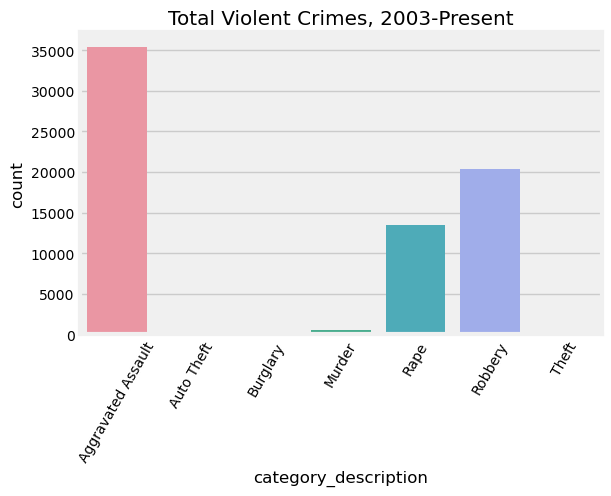

78741.0    0.123168
78753.0    0.095438
78758.0    0.091191
78723.0    0.074669
78702.0    0.068155
78744.0    0.060602
78701.0    0.060558
78745.0    0.059706
78704.0    0.049120
78752.0    0.048123
78721.0    0.029795
78724.0    0.026676
78748.0    0.022126
78757.0    0.019397
78705.0    0.018241
78751.0    0.017317
78759.0    0.015627
78727.0    0.010774
78749.0    0.010341
78754.0    0.009864
78729.0    0.009041
78617.0    0.008911
78722.0    0.008810
78750.0    0.007265
78731.0    0.005777
Name: zip_code, dtype: float64

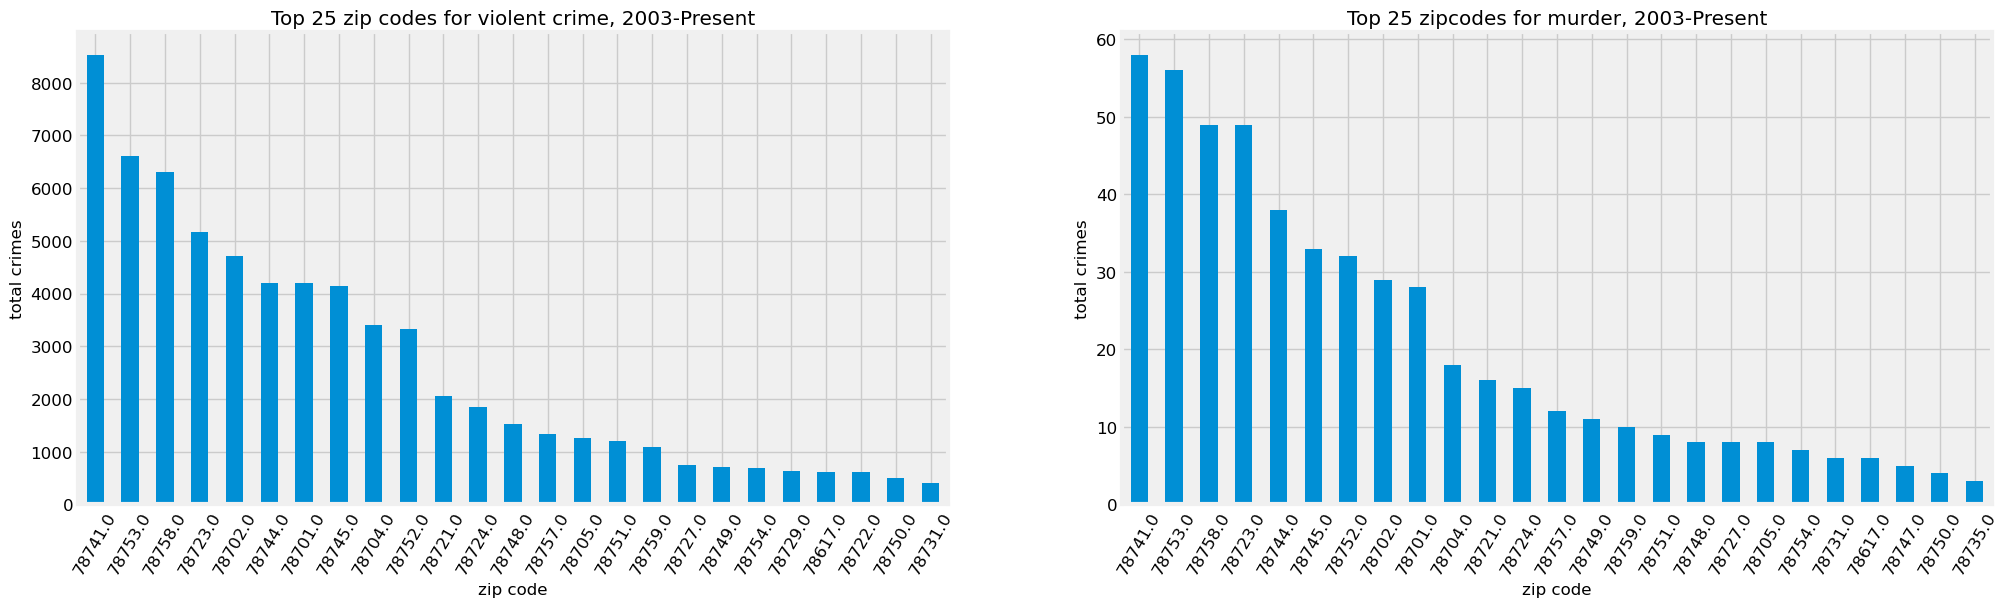

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    29       58
78617.0                              348       6   157      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                7       0     1        1
78653.0                               36       1     7        5
78660.0                              153       3    42       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2050      28   766     1349
78702.0                             2423      29   614     1653
78703.0                              166       2    85      113
78704.0                             1626      18   774      983
78705.0                              494       8   449      312
78712.0                                1       0     3        0
78717.0                              152       1    46       39
78719.0                               25       0     3       10
78721.0                             1294      16   310      443
78722.0                              268       3    98      241
78723.0                             2578      49   803     1740
78724.0                             1139      15   353      340
78725.0                               76       1    43       13
78726.0                              172       2    92       31
78727.0                              413       8   174      151
78728.0                               21       1    12        3
78729.0                              336       2   152      136
78730.0                               37       0    17        4
78731.0                              188       6   118       88
78732.0                                1       0     2        1
78733.0                                2       0     5        1
78735.0                              224       3    76       47
78736.0                               59       0    30       13
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               37       0    40        4
78741.0                             4119      58  1365     2986
78742.0                               83       2    20       24
78744.0                             2334      38   893      931
78745.0                             2221      33   859     1021
78746.0                              127       3    77      133
78747.0                              236       5    94       45
78748.0                              827       8   380      317
78749.0                              359      11   202      144
78750.0                              256       4   138      105
78751.0                              519       9   279      392
78752.0                             1627      32   488     1185
78753.0                             3335      56  1136     2081
78754.0                              378       7   158      140
78756.0                              155       2    99       96
78757.0                              677      12   237      417
78758.0                             3102      49  1092     2071
78759.0                              545      10   254      273

<Figure size 432x288 with 0 Axes>

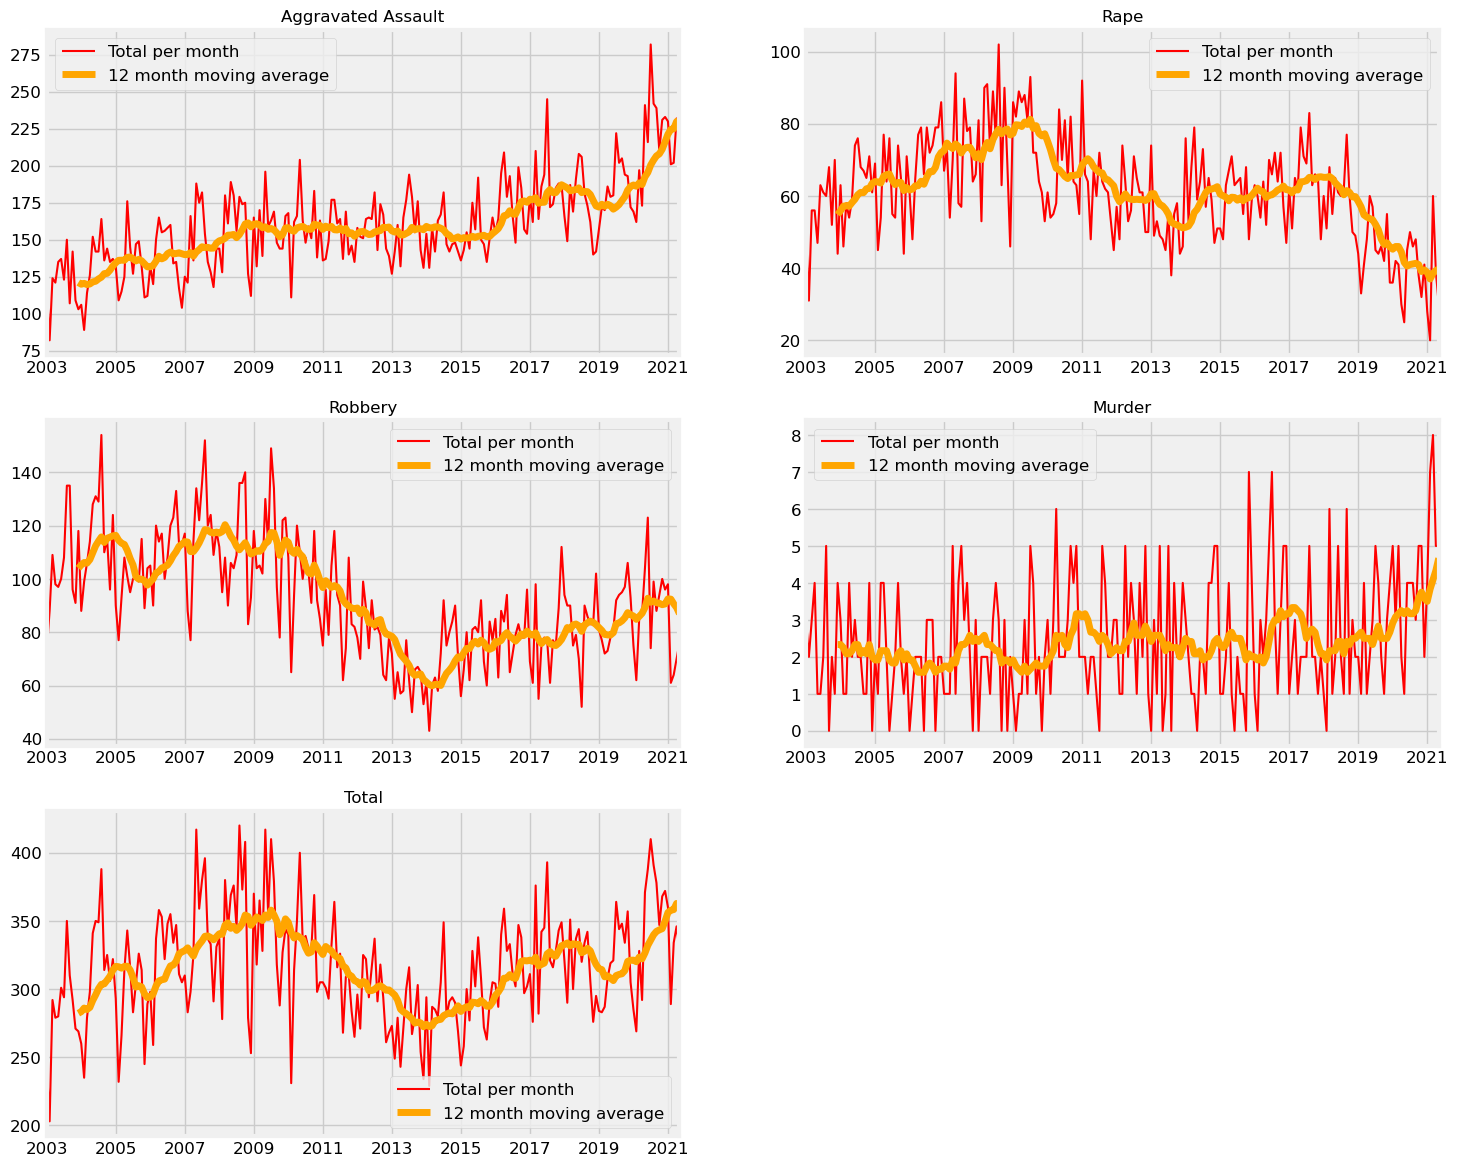

In [17]:
plt.figure(dpi=100)
plt.xticks(rotation="60")
sb.countplot(df_viol.category_description, data=df_viol).set_title(
    "Total Violent Crimes, 2003-Present"
)
plt.show()

display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

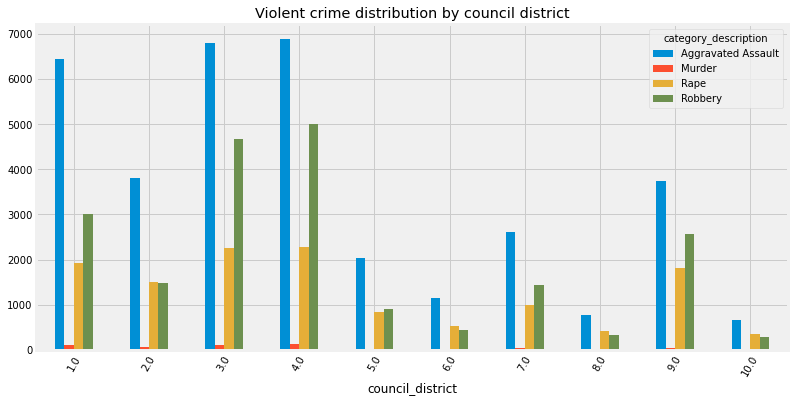

<Figure size 600x400 with 0 Axes>

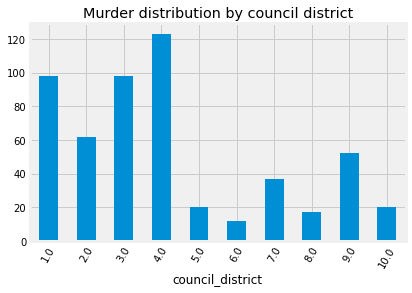

<Figure size 600x400 with 0 Axes>

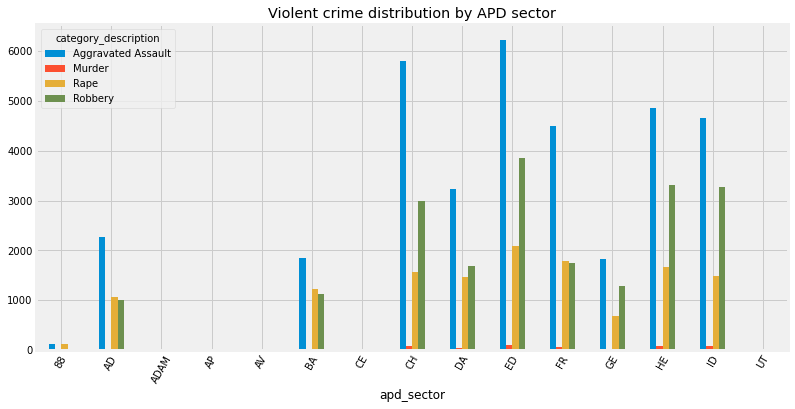

<Figure size 600x400 with 0 Axes>

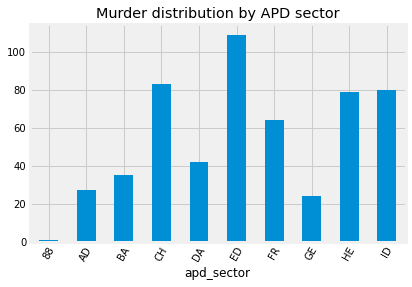

<Figure size 600x400 with 0 Axes>

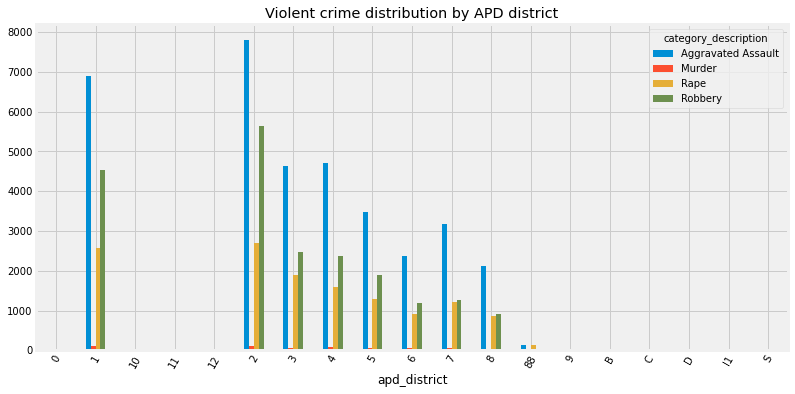

<Figure size 600x400 with 0 Axes>

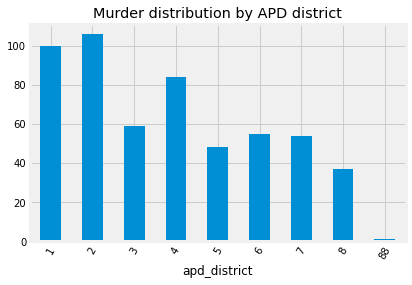

In [18]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.category_description
).plot.bar(rot=60, title="Murder distribution by council district", legend=False)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.category_description).plot.bar(
    rot=60, title="Murder distribution by APD sector", legend=False
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol_mur.apd_district, df_viol_mur.category_description).plot.bar(
    rot=60, title="Murder distribution by APD district", legend=False
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               757      12   
CAMP / CAMPGROUND                                               43       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   403       9   
COMMUNITY CENTER                                                 9       0   
CONSTRUCTION SITE                                               39       0   
CONVENIENCE STORE                                              281       3   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             121       6   
FIELD / WOODS                                                  289      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         262       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           763      14   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    5       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                464      13   
PARK / PLAYGROUND                                              181       1   
PARKING LOTS / GARAGE                                         4877     101   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17667     234   
REST AREA                                                        2       0   
RESTAURANTS                                                    257       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      22       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 52       0   
STREETS / HWY / ROAD / ALLEY                                  8294     107   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 112       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     13       12  
AMUSEMENT PARK                                     1        2  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        8  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      395  
BAR / NIGHT CLUB                                 157   

<Figure size 600x400 with 0 Axes>

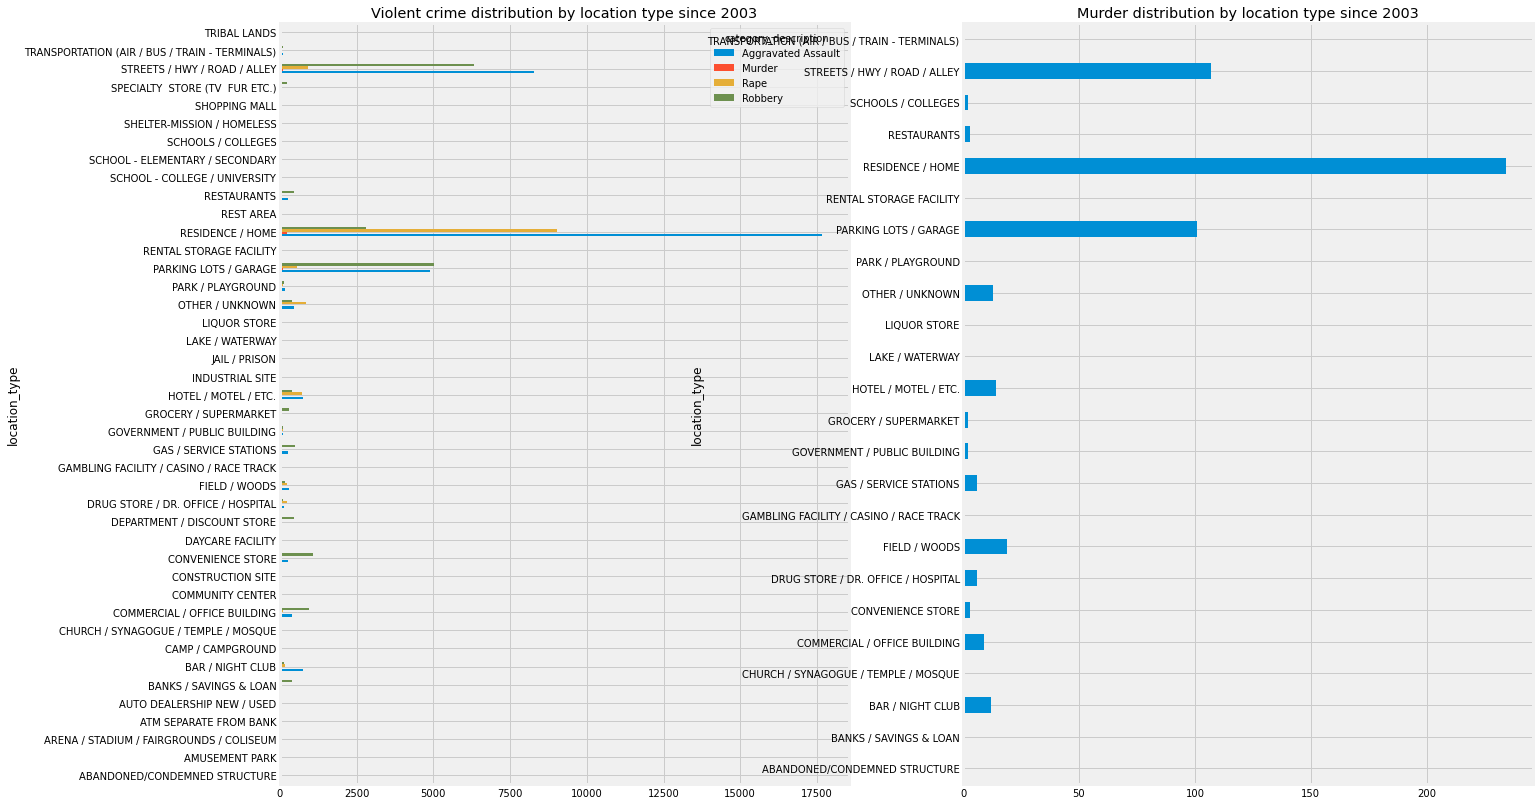

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.category_description
)

plt.figure(dpi=100)
fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50).to_frame()

address
4110 GUADALUPE ST                 11677
1030 NORWOOD PARK BLVD             9257
2901 S CAPITAL OF TEXAS HWY NB     8151
3600 PRESIDENTIAL BLVD             7410
500 E 7TH ST                       6132
1000 E 41ST ST                     5850
3708 S 2ND ST                      5265
2508 E RIVERSIDE DR                4850
11200 LAKELINE MALL DR             4509
9300 S IH 35 SVRD SB               4090
715 E 8TH ST                       4027
9414 N LAMAR BLVD                  3881
1137 GUNTER ST                     3219
710 E BEN WHITE BLVD SVRD WB       3217
6001 AIRPORT BLVD                  2922
12900 N IH 35 SVRD SB              2822
5800 TECHNI CENTER DR              2773
2701 E 7TH ST                      2733
5901 AIRPORT BLVD                  2718
6118 FAIRWAY ST                    2683
1300 CROSSING PL                   2650
1515 WICKERSHAM LN                 2475
2400 S CONGRESS AVE                2446
6409 SPRINGDALE RD                 2445
601 E 15TH ST                      2363
4700 E RIVERSIDE DR                2341
1500 FARO DR                       2326
1600 WICKERSHAM LN                 2251
1071 CLAYTON LN                    2250
9500 S IH 35 SVRD SB               2250
501 E 8TH ST                       2218
1301 CROSSING PL                   2169
600 BARWOOD PARK                   2111
12151 N IH 35 SVRD NB              2110
1700 BURTON DR                     2090
400 E 6TH ST                       2029
3909 N IH 35 SVRD NB               2016
1601 MONTOPOLIS DR                 2003
1124 RUTLAND DR                    1979
9200 NORTH PLZ                     1968
4404 E OLTORF ST                   1968
1704 NELMS DR                      1942
1800 E STASSNEY LN                 1911
12901 N IH 35 SVRD NB              1896
500 CANYON RIDGE DR                1888
10000 N LAMAR BLVD                 1875
2336 DOUGLAS ST                    1852
1054 SPRINGDALE RD                 1806
7000 DECKER LN                     1790
7112 ED BLUESTEIN BLVD SVRD SB     1772

In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13).to_frame()

address
00 BLOCK UNKNOWN            164
900 BLOCK E 32ND ST         146
1137 GUNTER ST              141
1030 NORWOOD PARK BLVD      134
6409 SPRINGDALE RD          131
500 E 7TH ST                131
1700 BURTON DR              126
1071 CLAYTON LN             115
9024 NORTHGATE BLVD         109
6103 MANOR RD               108
9200 NORTH PLZ              106
1054 SPRINGDALE RD          103
1124 RUTLAND DR             103

In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30).to_frame()

address
8800 N IH 35 SVRD SB             3
4700 E RIVERSIDE DR              3
8610 N LAMAR BLVD                3
601 E 15TH ST                    3
6409 SPRINGDALE RD               3
6407 SPRINGDALE RD               3
2400 WICKERSHAM LN               2
9010 GALEWOOD DR                 2
833 FAIRFIELD DR                 2
1050 SPRINGDALE RD               2
200 BLOCK E 6TH ST               2
744 W WILLIAM CANNON DR          2
7330 BLUFF SPRINGS RD            2
6600 ED BLUESTEIN BLVD SB        2
2713 S CONGRESS AVE              2
8225 SAM RAYBURN DR              2
6118 FAIRWAY ST                  2
10610 MORADO CIR                 2
1200 BLOCK E 38TH HALF ST        2
1711 RUTLAND DR                  2
2501 ANKEN DR                    2
7000 DECKER LN                   2
815 W SLAUGHTER LN               2
11105 N IH 35 SVRD NB            2
201 W 5TH ST                     2
9601 MIDDLE FISKVILLE RD         2
10503 N LAMAR BLVD               2
9220 N IH 35 SVRD SB             2
2508 E RIVERSIDE DR              2
2915 S IH 35 SVRD NB             2

In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")
df_viol_mur_21.to_csv("df_viol_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")